In [1]:
import os.path as osp
import sys
path = osp.dirname(osp.abspath(''))
sys.path.append(path)
sys.path.append(osp.join(path, "open_biomed"))
path

'/mnt/luoyz_dair/OpenBioMed'

In [3]:
# load data processor
import json
from open_biomed.utils.data_utils import DataProcessorFast
from open_biomed.utils import fix_path_in_config
from open_biomed.models.task_model.text2smi_model import Text2SMILESModel

config = json.load(open("../configs/text2smi/molt5.json", "r"))
fix_path_in_config(config, path)
print("Config: ", config)
processor = DataProcessorFast(entity_type="text", config=config["data"]["text"])

# load model
model = Text2SMILESModel(config["network"]).to("cuda:0")
model = model.eval()


You are using the legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This means that tokens that come after special tokens will not be properly handled. We recommend you to read the related pull request available at https://github.com/huggingface/transformers/pull/24565


Config:  {'model': 'MolT5', 'data': {'mol': {'modality': ['structure'], 'featurizer': {'structure': {'name': 'transformer', 'transformer_type': 't5', 'model_name_or_path': '/mnt/luoyz_dair/OpenBioMed/ckpts/text_ckpts/MolT5-base-caption2smiles', 'max_length': 512}}}, 'text': {'name': 'TransformerTokenizer', 'transformer_type': 't5', 'max_length': 512, 'model_name_or_path': '/mnt/luoyz_dair/OpenBioMed/ckpts/text_ckpts/MolT5-base-caption2smiles'}}, 'network': {'structure': {'name': 'molt5', 'model_name_or_path': '/mnt/luoyz_dair/OpenBioMed/ckpts/text_ckpts/MolT5-base-caption2smiles', 'transformer_type': 't5', 'stop_grad': True}}}


The molecule is is a morphinane alkaloid that is morphine bearing two acetyl substituents on the O-4 and O-6 positions. Its use includes treatment for acute pain, such as in severe physical trauma, myocardial infarction, post-surgical pain, and chronic pain. It has a role as an opioid analgesic, a mu-opioid receptor agonist and a prodrug. It is functionally related to a morphine.
Generated molecule:
CC(=O)O[C@H]1C=C[C@H]2[C@H]3CC4=C5[C@]2([C@H]1OC5=C(C=C4)OC(=O)C)CCN3C


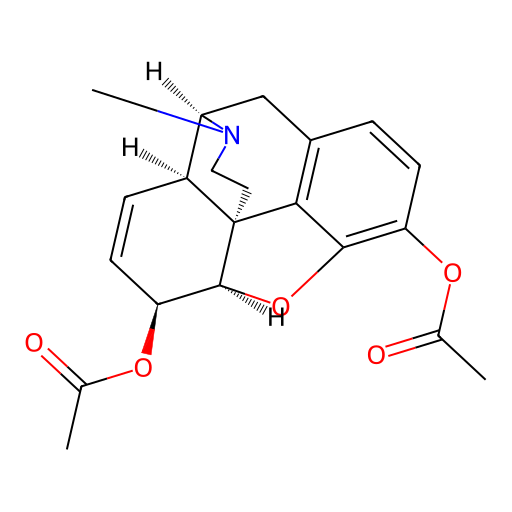

In [32]:
import torch
from rdkit import Chem
from rdkit.Chem import Draw

#input_text = "The molecule is the hydrochloride salt of a diacetyl derivative of the opiate morphine, a naturally occurring alkaloid extracted from the seedpod of the Asian poppy (Papaver sp.). Once administered, diamorphine (or diacetylmorphine) is rapidly hydrolyzed to 6-monoacetylmorphine (6-MAM) and then to the end-product morphine which binds to opiate receptors located throughout the mammalian nervous and gastrointestinal systems. Inducing a potent analgesia, the use of diamoprhine is often escalated due to a tolerance effect, resulting in abuse that is associated with fatal overdose, abortion, venous sclerosis, and opportunistic infections, among other adverse effects."
#input_text = "The molecule is a neurotoxin with potential analgesic activity. It binds to the pores of fast voltage-gated fast sodium channels in nerve cell membranes, inhibiting nerve action potentials and blocking nerve transmission."
input_text = "The molecule is is a morphinane alkaloid that is morphine bearing two acetyl substituents on the O-4 and O-6 positions. Its use includes treatment for acute pain, such as in severe physical trauma, myocardial infarction, post-surgical pain, and chronic pain. It has a role as an opioid analgesic, a mu-opioid receptor agonist and a prodrug. It is functionally related to a morphine."
#input_text = "The molecule is toxic to human body."
print(input_text)
input = processor(input_text).to("cuda:0")
with torch.no_grad():
    smiles = model.decode_mol(input, num_beams=5, max_length=512)[0]
print("Generated molecule:")
smiles = "".join(model.decoder_tokenizer.batch_decode(smiles, skip_special_tokens=True)[1:-1])
print(smiles)
Draw.MolsToGridImage(
    [Chem.MolFromSmiles(smiles)], 
    molsPerRow=1, 
    subImgSize=(512, 512)
)

In [ ]:
#